In [1]:
import pandas as pd
import re
import numpy as np
from time import time 
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from umap import UMAP
import multiprocessing
from sklearn.cluster import KMeans
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import spacy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/miniconda3/envs/py366/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
tweets_user = pd.read_csv('/Users/Noelia/Desktop/DATA_IRONHACK/FINAL_PROJECT/final_project_ironhack/output/User_csv/@Noelia_Carrion9_tweets.csv')

In [3]:
tweets_user.head()

,id,created_at,text
0,1156508893893275648,2019-07-31 10:16:21,RT @voz_populi: Podemos e IU denuncian a ocho ...
1,1156508767934136321,2019-07-31 10:15:51,RT @MujeresRtve: Nuestro pesar por la muerte d...
2,1156508688506589184,2019-07-31 10:15:32,RT @elespanolcom: #Investigación | Científicos...
3,1156508626317656067,2019-07-31 10:15:18,RT @TheObjective_es: En la primera de las cuat...
4,1156508475406635008,2019-07-31 10:14:42,"RT @eldiarioes: ""Afilando los cuchillos"": iLe ..."


In [4]:
#tweet_text = tweets_user[['text']]

In [5]:
def retweet(input_text):
    if input_text.startswith("RT"):
        value = 1
    else:
        value = 0
    return value

In [6]:
tweets_user['RT'] = tweets_user.text.apply(retweet)

In [7]:
tweets_user['mention'] = tweets_user.text.str.findall(r'(?<![@\w])@(\w{1,25})').apply(', '.join)

In [8]:
tweets_user['hashtag'] = tweets_user.text.str.extract(r'(\#\w+)', expand=False)

In [9]:
tweets_user['hashtag'] = tweets_user['hashtag'].fillna("")

In [10]:
#def remove_characters(input_text):
 #   return re.sub('http\S+|www.\S+', "", input_text)
    #list_remove = ["RT", "(?<![@\w])@(\w{1,25})", "\#+"]
    #for charac in list_remove:
        #input_text = re.sub(charac, '', input_text)
#    return input_text.lower()
#def remove_special_characters(data, colum):
#    input_text = data[colum].str.replace("[\d\W_]+", " ", re.UNICODE)
#    return input_text
#def deEmojify(inputString):
 #   return inputString.encode('latin-1', 'ignore').decode('latin-1')#

In [11]:
#def removeSpace(x):
 #       return " ".join([w for w in x.split() if len(w)>3])

In [12]:
#tweets_user['cleaned_tweets'] = tweets_user.text.apply(remove_characters)

In [13]:
#tweets_user[['cleaned_tweets']].head()

In [14]:
#tweets_user['cleaned_tweets'] = tweets_user['cleaned_tweets'].str.replace('http\S+|www.\S+', "")

In [15]:
#tweets_user['cleaned_tweets'] = remove_special_characters(tweets_user, "cleaned_tweets")

In [16]:
#tweets_user['cleaned_tweets'] = tweets_user['cleaned_tweets'].apply(deEmojify)

In [17]:
#tweets_user['cleaned_tweets'] = tweets_user['cleaned_tweets'].apply(removeSpace)

In [18]:
#tweets_user['cleaned_tweets']

In [19]:
#def remove_characters(input_text):
 #   list_remove = ["RT", "@", "\#+", 'http\S+|www.\S+']
  #  for charac in list_remove:
   #     input_text = re.sub(charac, '', input_text)
   # return input_text.lower()

In [20]:
#tweets_user['tokenized'] = tweets_user['text'].apply(spacy_tokenizer)

In [21]:
#tweets_user = tweets_user[tweets_user['tokenized'].map(lambda d: len(d)) > 0]

In [22]:
#tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [23]:
#vector2 = bow_vector.fit_transform(all_tweets)

In [24]:
tweets_user['date'] = tweets_user['created_at']

In [25]:
tweets_user['date'] = pd.DatetimeIndex(tweets_user['created_at']).to_period('D')

In [26]:
tweets_user = tweets_user.drop(columns=["created_at"], axis=1)

In [27]:
#tweets_user = tweets_user[["id", "date", "mention", "hashtag", "RT", "cleaned_tweets"]]

In [28]:
#def tokenize(s):
    #return s.split(" ") 

In [29]:
import es_core_news_sm

In [30]:
nlp = es_core_news_sm.load()

In [31]:
nlp = spacy.load('es', parser=True)

# English tokenizer, tagger, parser, NER and word vectors
#parser = ()

In [211]:
nlp.Defaults.stop_words |= {"RT","próx", "xd", "rt", "htt"}

In [212]:
#nlp.Defaults.stop_words.add([["rt", "amp"]])

In [213]:
def spacy_tokenizer(sentence):
    #sentence = remove_characters(sentence) 
    sentence = re.sub(r'htt\S+', '', sentence)
    #sentence = sentence.replace('http\S+|www.\S+', "") 
    tokens = nlp(sentence)
    filtered_tokens = []
    for word in tokens:
        lemma = word.lemma_.lower().strip()
        
        if lemma not in STOP_WORDS and re.search('^[a-zA-Z]{2}', lemma):
            filtered_tokens.append(lemma)

    return filtered_tokens

#" ".join([token.lemma_ for token in doc])


#if word.lemma_ != "-PRON-" else word.lower_

In [214]:
tweets_user['tokenized'] = tweets_user['text'].apply(spacy_tokenizer)

In [215]:
tweets_user.head()

,id,text,RT,mention,hashtag,date,tokenized
0,1156508893893275648,RT @voz_populi: Podemos e IU denuncian a ocho ...,1,voz_populi,,2019-07-31,"[iu, denunciar, ministro, delito, operación, c..."
1,1156508767934136321,RT @MujeresRtve: Nuestro pesar por la muerte d...,1,MujeresRtve,#rtve,2019-07-31,"[muerte, mari, carmen, izquierdo, pionero, per..."
2,1156508688506589184,RT @elespanolcom: #Investigación | Científicos...,1,elespanolcom,#Investigación,2019-07-31,"[investigación, científicos, españolar, creer,..."
3,1156508626317656067,RT @TheObjective_es: En la primera de las cuat...,1,TheObjective_es,,2019-07-31,"[jornada, holgar, convocar, renfe, cancelar, t..."
4,1156508475406635008,"RT @eldiarioes: ""Afilando los cuchillos"": iLe ...",1,eldiarioes,,2019-07-31,"[afilando, cuchillo, ile, calle, hablar, canci..."


In [216]:
tweets_user['tokenized']

0      [iu, denunciar, ministro, delito, operación, c...
1      [muerte, mari, carmen, izquierdo, pionero, per...
2      [investigación, científicos, españolar, creer,...
3      [jornada, holgar, convocar, renfe, cancelar, t...
4      [afilando, cuchillo, ile, calle, hablar, canci...
                             ...                        
636                 [fabricar, piano, siglo, curiosidad]
637      [votante, documentación, parir, votar, correar]
638        [indignar, podéis, verlo, mapa, colaboración]
639     [otan, investigar, bombardear, civil, coalición]
640                     [recetar, finlandés, corrupción]
Name: tokenized, Length: 641, dtype: object

In [217]:
num_features = 300
min_word_count = 50
num_workers = multiprocessing.cpu_count()
context_size = 10
downsampling = 1e-4
seed = 2

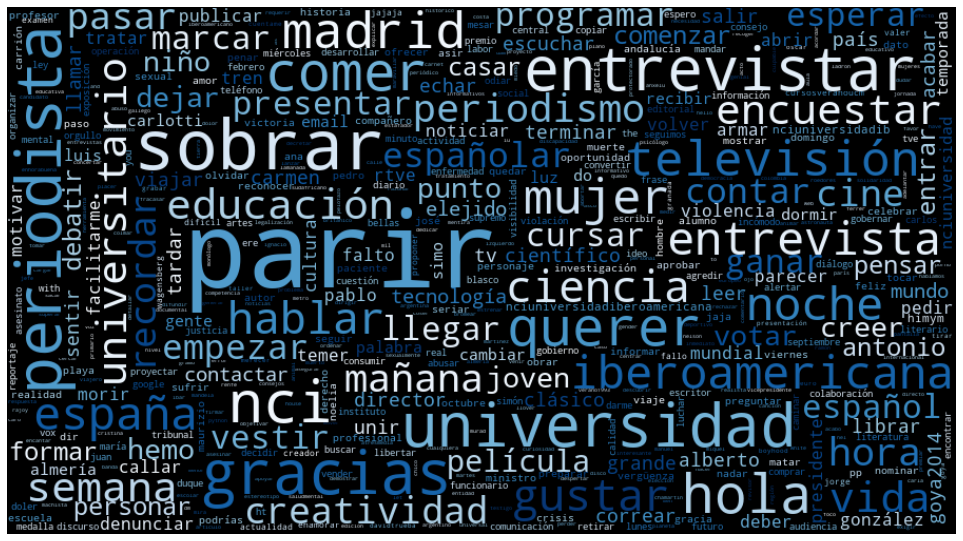

In [218]:
all_words = []
for line in tweets_user['tokenized']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
#def tokenize_only(text):
 #   tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
  #  filtered_tokens = []
    #filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
   # for token in tokens:
  #      if re.search('[a-zA-Z]', token):
    #        filtered_tokens.append(token)
   # return filtered_tokens

In [41]:
#totalvocab_stemmed = []
#totalvocab_tokenized = []
#for i in tweets_user['text']:
 #   allwords_stemmed = tokenize_and_stem(i)
  #  totalvocab_stemmed.extend(allwords_stemmed)
    
   # allwords_tokenized = tokenize_only(i)
   # totalvocab_tokenized.extend(allwords_tokenized)

In [42]:
#vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
#print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer, min_df=3)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(tweets_user['text'].values)

print(tfidf_matrix.shape)

CPU times: user 5.54 s, sys: 14.5 ms, total: 5.55 s
Wall time: 5.55 s
(641, 310)


In [44]:
terms = tfidf_vectorizer.get_feature_names()

In [45]:
array_matrix = tfidf_matrix.toarray()

In [46]:
first_vector_tfidfvectorizer=tfidf_matrix[0]
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
operación,0.603894
denunciar,0.563610
ministro,0.563610
noche,0.000000
olvidar,0.000000


In [47]:
vocab = tfidf_vectorizer.vocabulary_

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[-4.44089210e-16,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -2.22044605e-16,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import umap

In [50]:
umap = UMAP(n_components=2, n_neighbors=5)
embedding = umap.fit_transform(dist)

/miniconda3/envs/py366/lib/python3.6/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../../../miniconda3/envs/py366/lib/python3.6/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/miniconda3/envs/py366/lib/python3.6/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../../../miniconda3/envs/py366/lib/python3.6/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/miniconda3/envs/py366/lib/python3.6/site-packages/numba/compiler.py

In [51]:
umap_df = pd.DataFrame(embedding, columns=[f'emb_{i+1}' for i in range(2)])

In [52]:
umap_df.head()

,emb_1,emb_2
0,-12.897002,-2.054843
1,-12.405255,-1.799325
2,-10.782147,1.640779
3,-12.980626,-2.145325
4,-12.385340,0.887874


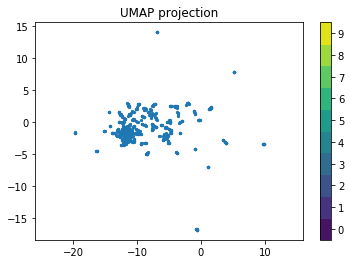

In [53]:
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection', fontsize=12);

In [120]:
from hdbscan import HDBSCAN
    
hdbscan = HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)

clustering = hdbscan.fit_predict(embedding)

np.unique(clustering)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [121]:
hdbscan.labels_.max()

12

In [122]:
labels = hdbscan.labels_

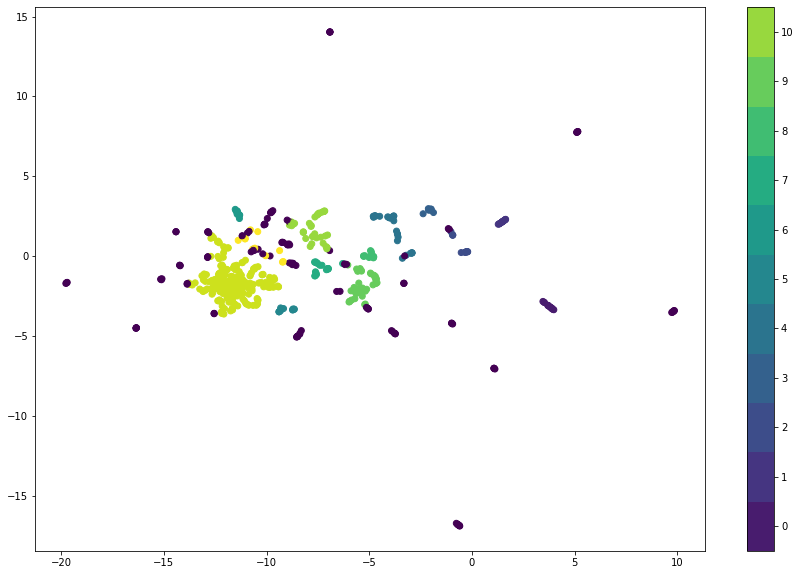

In [123]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(embedding[:,0], embedding[:,1], c=clustering);
plt.colorbar(boundaries=np.arange(12)-0.5).set_ticks(np.arange(11))

In [124]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(embedding, hdbscan.fit_predict(embedding)))

Silhouette Coefficient: 0.218


In [125]:
from mpl_toolkits.mplot3d import Axes3D

In [229]:
from sklearn.cluster import KMeans

num_clusters = 6

km = KMeans(n_clusters=num_clusters)

%time km.fit(embedding)

clusters = km.labels_.tolist()

CPU times: user 46.2 ms, sys: 2.84 ms, total: 49 ms
Wall time: 46.6 ms


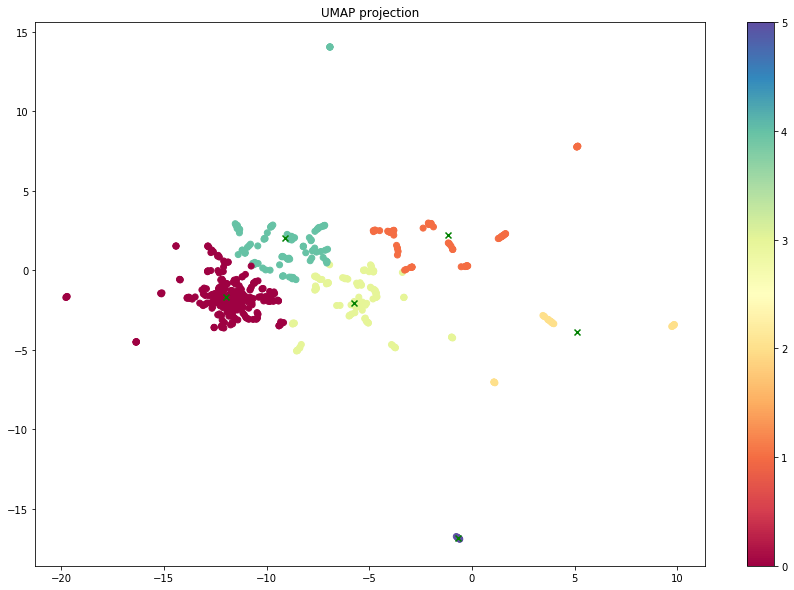

In [262]:
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(15, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c =km.labels_, cmap='Spectral')
#plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()#boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))
centers = np.array(km.cluster_centers_)

#This array is one dimensional, thus we plot it using:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='green')
plt.title('UMAP projection', fontsize=12);

In [231]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(embedding, km.predict(embedding)))

Silhouette Coefficient: 0.487


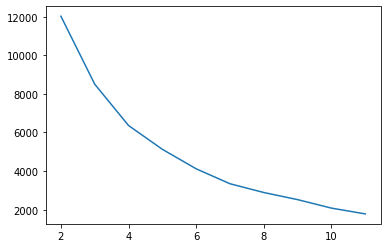

In [232]:
inertia = []

for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(embedding)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(2, 12), inertia);

In [233]:
tweets = {'tweet': tweets_user['text'].values, "words": tweets_user['tokenized'].values, 'cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters] , columns = ['tweet', 'words', "cluster"])

In [267]:
frame[frame['cluster']==1].head()

,tweet,words,cluster
1,@palzaga Gracias por el aviso. He estado a pun...,"[gracias, avisar, punto, darle]",1
1,RT @aventurasaber: NCI Educación es un program...,"[nci, educación, programar, semanal, iberoamer...",1
1,Hoy hemos entrevistado a @ViolaSofia para @NCI...,"[hemo, entrevistar, parir, noche, abrir, conce...",1
1,RT @NCINoticias: Esta semana en NCI Educación:...,"[semana, nci, educación, saludmental, espacio,...",1
1,"@BelliRamirez Buenos días Belli, soy Noelia Ca...","[belli, noelia, carrión, periodista, televisió...",1


In [236]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df.head()

,abrir,abusar,acabar,actividad,actualidad,agredir,alberto,almería,alumno,amor,...,viernes,violación,violencia,visibilidad,visitar,volver,votar,vox,wagensberg,you
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.409703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
def get_df_from_cluster(cluster):
    return tfidf_df[clustering==cluster]

In [263]:
top_words_cluster = get_df_from_cluster(0).T.sum(axis=1).sort_values(ascending=False)
top_words_cluster.head(20)

querer         10.140104
escuchar        1.133964
parir           1.129115
creer           0.855463
sufrir          0.801169
mirar           0.801169
presentar       0.769364
oportunidad     0.746779
incómodo        0.663913
muerte          0.639358
olvidar         0.639358
casar           0.629561
morir           0.602616
calidad         0.581720
parecer         0.575338
encontrar       0.565504
profesor        0.563744
comer           0.555277
rtve            0.542915
sentir          0.513439
dtype: float64